In [1]:
import pandas as pd
import os

import numpy as np

import matplotlib.pyplot as plt

In [2]:

ecb_with_sentiment = pd.read_csv('./ecb_with_sentiment_bert.csv')
ecb_with_sentiment.head()

ecb_with_sentiment=ecb_with_sentiment.drop(columns=["contents"])
# ecb_with_sentiment = ecb_with_sentiment.loc[ecb_with_sentiment.subtitle.str.contains("\sMember\s"),:]

In [3]:
ecb_with_sentiment.to_csv('./ecb_sentiment_only_bert.csv')

In [4]:
len(ecb_with_sentiment)

2460

In [5]:
ecb_with_sentiment = ecb_with_sentiment[ecb_with_sentiment.neu_mean < 0.45]

In [6]:
len(ecb_with_sentiment)

573

In [7]:
# for each time interval (quarterly)
#    check speech overal sentiment
#    plot graph
 
# quarters = ["({0})".format(i) for i in range(1,13)]
quarters = ["(1|2|3)","(4|5|6)", "(7|8|9)","(10|11|12)"]
# quarters = ["(1|2|3|4|5|6|7|8|9|10|11|12)"]
# quarters = ["(1|2|3|4|5|6)","(7|8|9|10|11|12)"]



quarterly_data = pd.DataFrame(columns = ["year","quarter","mean","std", "fss_mean", "fss_std", "pos_mean", "pos_std", "neg_mean","neg_std"])


for year in range(1997,2022):
    for index, quarter in enumerate(quarters):
        data = ecb_with_sentiment.loc[ecb_with_sentiment['date'].str.contains(str(year) + '-0?' + quarter + '-'), :]
        # assume sample mean (neglect difference in datapoints)
        temp_data = pd.DataFrame([[year, index + 1, (data['pos_std']-data['neg_std']).mean(),(data['pos_std']-data['neg_std']).std(), data['fss'].mean(), data['fss'].std(),data['pos_mean'].mean(), data['pos_mean'].std(),data['neg_mean'].mean(), data['neg_mean'].std(), ]],columns = ["year","quarter","mean","std",  "fss_mean", "fss_std","pos_mean", "pos_std", "neg_mean","neg_std"])
    
        quarterly_data = quarterly_data.append(temp_data, ignore_index = True)






/var/folders/j9/rqqkqhds231b5h_6lrr4xt6h0000gn/T/ipykernel_26122/252363109.py:17: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  data = ecb_with_sentiment.loc[ecb_with_sentiment['date'].str.contains(str(year) + '-0?' + quarter + '-'), :]


In [8]:
quarterly_data.columns

Index(['year', 'quarter', 'mean', 'std', 'fss_mean', 'fss_std', 'pos_mean',
       'pos_std', 'neg_mean', 'neg_std'],
      dtype='object')

In [9]:
# quarterly_data = quarterly_data.dropna()

In [10]:
quarterly_data.to_csv('./ecb_sentiment_quarterly.csv')

In [11]:

quarterly_data

,year,quarter,mean,std,fss_mean,fss_std,pos_mean,pos_std,neg_mean,neg_std
0,1997,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,2020,4,-0.041620,0.047084,0.039108,0.143581,0.369652,0.106844,0.330064,0.103967
96,2021,1,0.007214,0.133393,0.171354,0.268838,0.417171,0.146637,0.242712,0.166490
97,2021,2,-0.027489,0.053466,0.120325,0.284576,0.418694,0.217917,0.286439,0.126956
98,2021,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
year = [[ year + index/4 for index in range (0, 4) ]for year in range(1997,2022)]
year = [item for sublist in year for item in sublist]
# year = [ year for year in range(1997,2022)]
mean = quarterly_data['mean'].to_numpy()
std = quarterly_data['std'].to_numpy()
fss_mean = quarterly_data['fss_mean'].to_numpy()
fss_std = quarterly_data['fss_std'].to_numpy()
pos_mean = quarterly_data['pos_mean'].to_numpy()
pos_std = quarterly_data['pos_std'].to_numpy()
neg_mean = quarterly_data['neg_mean'].to_numpy()
neg_std = quarterly_data['neg_std'].to_numpy()


In [13]:

# import matplotlib.pyplot as plt

# t = np.arange(len(mean))

# sp = np.fft.fft(mean)
# freq = np.fft.fftfreq(t.shape[-1])
# plt.plot(freq, sp.real, freq, sp.imag)
# plt.show()
# # print(np.abs(sp))

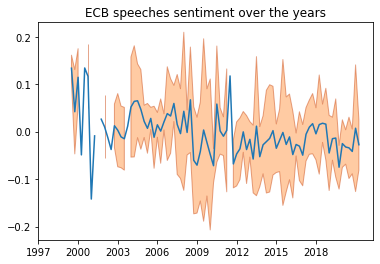

In [18]:

fig = plt.figure()


# import scipy.signal as signal

# sos = signal.butter(536, 35, 'lp', fs=1000, output='sos')
# filtered = signal.sosfiltfilt(sos, mean)

x = year
y = mean *3
yerr = std
   
# plt.errorbar(x, y, yerr = yerr)
plt.plot(x,y)

plt.fill_between(x, y-yerr, y+yerr,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
   
plt.xticks(np.arange(1997, 2021, 3))
plt.title('ECB speeches sentiment over the years')
plt.show()

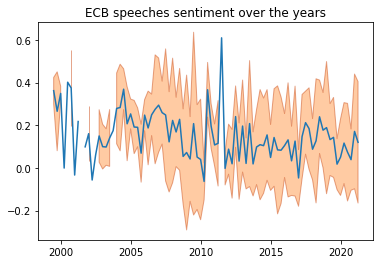

In [15]:

fig = plt.figure()
x = year
y = fss_mean
yerr = fss_std
   
# plt.errorbar(x, y, yerr = yerr)
plt.plot(x,y)

plt.fill_between(x, y-yerr, y+yerr,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
   
plt.title('ECB speeches sentiment over the years')
plt.show()

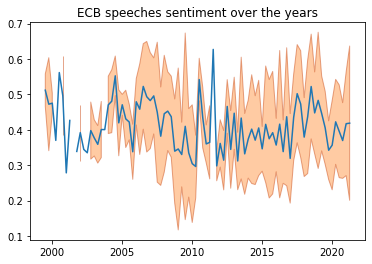

In [16]:

fig = plt.figure()
x = year
y = pos_mean
yerr = pos_std
   
# plt.errorbar(x, y, yerr = yerr)
plt.plot(x,y)

plt.fill_between(x, y-yerr, y+yerr,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
   
plt.title('ECB speeches sentiment over the years')
plt.show()

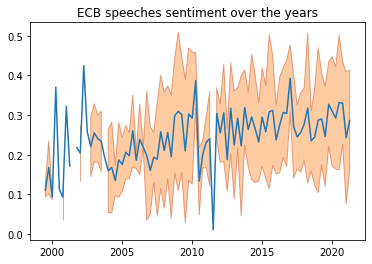

In [17]:

fig = plt.figure()
x = year
y = neg_mean
yerr = neg_std
   
# plt.errorbar(x, y, yerr = yerr)
plt.plot(x,y)

plt.fill_between(x, y-yerr, y+yerr,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
   
plt.title('ECB speeches sentiment over the years')
plt.show()